In [1]:
import pandas
from sklearn.metrics import roc_curve,auc
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import operator
from sklearn.metrics.pairwise import euclidean_distances
from collections import defaultdict
from heapq import heappush,nsmallest
from scipy.optimize import brentq
from sklearn.metrics import confusion_matrix
from scipy.interpolate import interp1d
from scipy.spatial import distance
from numpy import sqrt

#import itertools

#from sklearn.model_selection import train_test_split




%pylab inline
train = pandas.read_csv("train.csv")
test = pandas.read_csv("test.csv")
trainData = train.drop("label", axis = 1).values
print "Done importing and dropping Label column"


Populating the interactive namespace from numpy and matplotlib
Done importing and dropping Label column


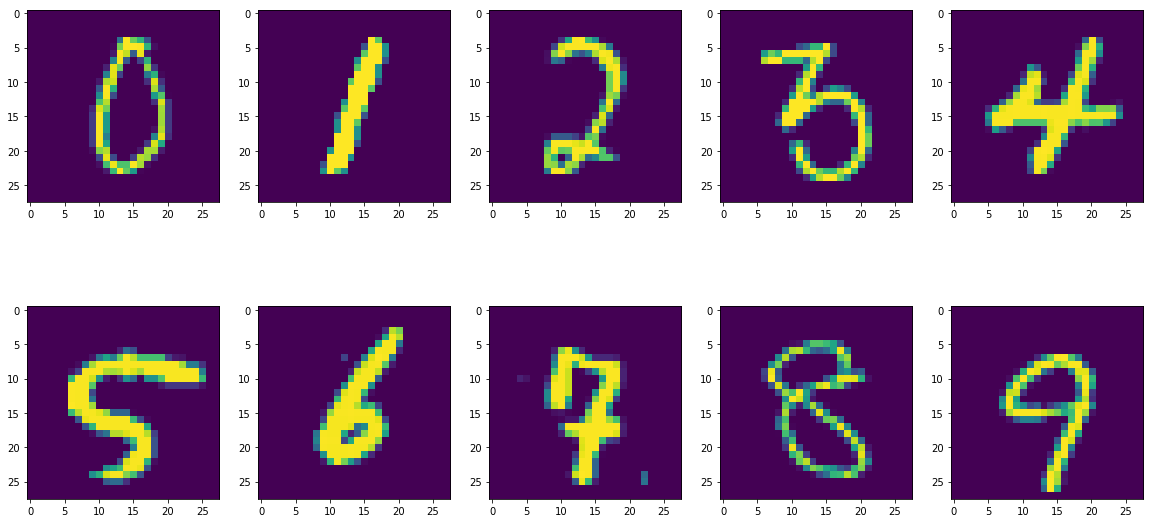

In [17]:
figurePrint,axis = plt.subplots(2,5)
figurePrint.set_figwidth(20)
figurePrint.set_figheight(10)
axis[0,0].imshow(np.resize(trainData[69,:], (28,28)))
axis[0,1].imshow(np.resize(trainData[68,:], (28,28)))
axis[0,2].imshow(np.resize(trainData[84,:], (28,28)))
axis[0,3].imshow(np.resize(trainData[90,:], (28,28)))
axis[0,4].imshow(np.resize(trainData[81,:], (28,28)))
axis[1,0].imshow(np.resize(trainData[62,:], (28,28)))
axis[1,1].imshow(np.resize(trainData[74,:], (28,28)))
axis[1,2].imshow(np.resize(trainData[76,:], (28,28)))
axis[1,3].imshow(np.resize(trainData[87,:], (28,28)))
axis[1,4].imshow(np.resize(trainData[88,:], (28,28)))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a194adbd0>]],
      dtype=object)

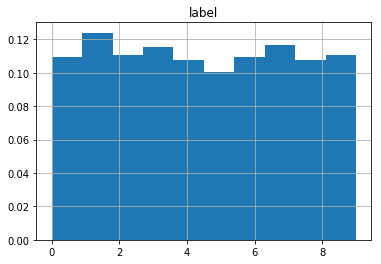

In [21]:
train.hist(column='label',normed=True)

There are more 1's and 7's than the others and 5's are the fewest. The digit counts are not even, meaning the prior probabilities are not equal.

In [5]:
digitDictionary = {"69":"0", "68":"1", "84":"2", "90":"3", "81":"4", "62":"5", "74":"6", "76":"7", "87":"8", "88":"9"}

for index, value in digitDictionary.iteritems():
    digitDist = []
    digitArr = []
    labels = train.loc[:,'label'].values
    for i in range(len(trainData)):
        if int(index) != i: 
            digitDist.append(distance.euclidean(trainData[int(index), :], trainData[i, :]))
            digitArr.append(labels[i])
            idex, minVal = min(enumerate(digitDist), key=operator.itemgetter(1))
    print "The minimum distance for digit " + str(value) + " is with digit " + str(digitArr[idex]) + " with distance " + str(minVal) 


The minimum distance for digit 7 is with digit 7 with distance 1317.6843324559945
The minimum distance for digit 5 is with digit 5 with distance 1369.668938101467
The minimum distance for digit 6 is with digit 6 with distance 830.6744247898812
The minimum distance for digit 9 is with digit 9 with distance 1110.7335414040579
The minimum distance for digit 3 is with digit 5 with distance 1365.4486442191812
The minimum distance for digit 1 is with digit 1 with distance 466.0514993002383
The minimum distance for digit 0 is with digit 0 with distance 1069.8121330401893
The minimum distance for digit 4 is with digit 4 with distance 1007.6998561079583
The minimum distance for digit 8 is with digit 8 with distance 1516.7362987678512
The minimum distance for digit 2 is with digit 2 with distance 1232.6552640539853


We matched a 5 to the 3 we had picked out, but the rest of the points worked.

Done!


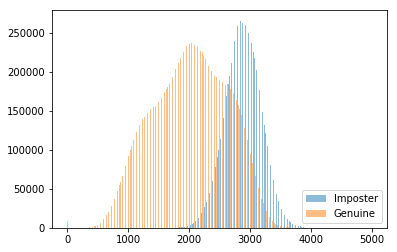

In [6]:
zerosArray, onesArray = [],[]

for index in range(len(labels)):
    if labels[index] == 0:
        zerosArray.append(trainData[index,:])
    elif labels[index] == 1:
        onesArray.append(trainData[index,:])

zerosGenuine = euclidean_distances(zerosArray, zerosArray)
onesGenuine = euclidean_distances(onesArray, onesArray)
imposter = euclidean_distances(onesArray, zerosArray)
genuineDistance = numpy.concatenate([np.asarray(zerosGenuine).reshape(-1), np.asarray(onesGenuine).reshape(-1)])

print "Done!"

bins = np.linspace(0,5000,500)
plt.hist([imposter, genuineDistance], bins, alpha =0.5, label=['Imposter', 'Genuine'])
plt.legend(loc='lower right')
plt.show()


In [7]:
imposterDistance = np.asarray(imposter).reshape(-1)

yVals = np.concatenate([np.zeros(len(genuineDistance)), np.ones(len(imposterDistance))])
score = np.concatenate([genuineDistance, imposterDistance]
                      )
fpr,tpr,thresholds = roc_curve(yVals, score)
roc_auc = auc(fpr,tpr)

print "Finished"

Finished


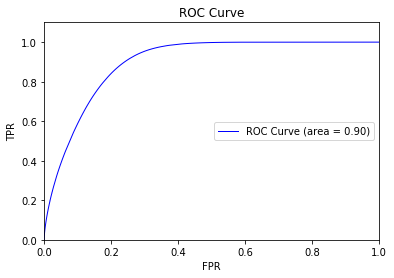

Equal Error Rate is 0.185547844221


In [10]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc,lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="center right")
plt.show()

errorCalc = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
print "Equal Error Rate is " + str(errorCalc)

The error rate of guessing randomly is around 53%

In [107]:
def distanceMeasure(a,b):
    tempSum = sum((a-b)**2)
    return (tempSum**.5)

def maxLabel(labelList):
    labelCount = defaultdict(int)
    for label in labelList:
        labelCount[label[1]] += 1
    maxLabel = max(labelCount.iteritems(),key=operator.itemgetter(1))[0]
    return maxLabel

def kNN(k,trainData,trainLabels,testDigit):
    distanceArray = []
    for counter in range(len(trainLabels)):
        dist = distanceMeasure(testDigit,trainData[counter,:])
        heappush(distanceArray,(dist,trainLabels[counter]))
    neighbors = nsmallest(k,distanceArray)
    label = maxLabel(neighbors)
    return label

print "Done"

In [ ]:
dataLength = len(labels)
foldLength = dataLength/3

firstCorrect = 0
secondCorrect = 0
thirdCorrect = 0

firstPredictions = []
secondPredictions = []
thirdPredictions = []

firstFoldBegin = 0
firstFoldEnd = foldLength

secondFoldBegin = foldLength
secondFoldEnd = firstFoldEnd*2

thirdFoldBegin = firstFoldEnd*2
thirdFoldEnd = dataLength



In [ ]:
#First Fold
for counter in range(firstFoldBegin,firstFoldEnd):
    print counter
    expectedLabel = labels[counter]
    computedLabel = kNN(3,trainData[secondFoldBegin:thirdFoldEnd,:],labels[secondFoldBegin:thirdFoldEnd],trainData[counter,:])
    if (expectedLabel == computedLabel):
        firstCorrect += 1
    firstPredictions.append(computedLabel)
firstFoldAccuracy = float(firstCorrect)/float(foldLength)

In [ ]:
#Second Fold
for counter in range(secondFoldBegin,secondFoldEnd):
    secondFold_trainData = np.concatenate((trainData[firstFoldBegin:firstFoldEnd,:],trainData[thirdFoldBegin:thirdFoldEnd,:]))
    secondFold_labels = np.concatenate((labels[firstFoldBegin:firstFoldEnd],labels[thirdFoldBegin:thirdFoldEnd]))
    
    expectedLabel = labels[counter]
    computedLabel = kNN(3,secondFold_trainData,secondFold_labels,trainData[counter,:])
    
    if (expectedLabel == computedLabel):
        secondCorrect += 1
    secondPredictions.append(computedLabel)
secondFoldAccuracy = float(secondCorrect)/float(foldLength)

In [ ]:
#Third Fold
for counter in range(thirdFoldBegin,thirdFoldEnd):
    expectedLabel = labels[counter]
    computedLabel = kNN(3,trainData[firstFoldBegin:secondFoldEnd,:],labels[firstFoldBegin:secondFoldEnd],trainData[counter,:])
    
    if (expectedLabel == computedLabel):
        thirdCorrect += 1
    thirdPredictions.append(computedLabel)
thirdFoldAccuracy = float(thirdCorrect)/float(foldLength)

In [13]:
print "Total accuracy from 3-fold Cross Verification is " + str((firstFoldAccuracy+secondFoldAccuracy+thirdFoldAccuracy)/3)
predictions = np.concatenate((firstPredictions,secondPredictions,thirdPredictions))

Total accuracy from 3-fold Cross Verification is 0.966166666667


In [190]:
confusionMatrix = confusion_matrix(labelList,predictions)
print(confusionMatrix)

[[4110    0    4    0    0    5   10    0    2    1]
 [   0 4655    8    1    2    1    4    7    3    3]
 [  31   46 3982   12    3    3    4   73   15    8]
 [   6   12   30 4182    0   37    2   21   37   24]
 [   3   43    0    0 3887    0   15    4    3  117]
 [  14    2    1   65    2 3614   43    2   14   38]
 [  26    6    0    0    5   17 4080    0    3    0]
 [   2   54    9    1    8    0    0 4268    0   59]
 [  20   45   10   42   14   68   17   10 3792   45]
 [  14    9    2   26   38   10    2   58   20 4009]]


Confusing 4's and 9's seemed tricky with 117 misses one way and 38 misses the other way

In [ ]:
#Kaggle

labels = allData.loc[:,'label'].values
y_pred = []

for idx in range(len(testData)):
    computedLabel = KNN(3,trainData,labels,testData.values[idx,:])
    y_pred.append(computedLabel)
ImageId = []

for i in range(1, 28001):
    ImageId.append(i)
print(len(ImageId))
print(len(y_pred))
submission = pandas.DataFrame({
        "ImageId": ImageId,
        "Label": y_pred
    })
    
submission.to_csv("predictions.csv", index=False)